### 数据来源 Data Source：CDNOW sales data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime
import seaborn as sns

In [2]:
columns = ['user_id', 'order_dt', 'order_products', 'order_amount']
df = pd.read_table('CDNOW_master.txt', sep = '\s+', names = columns)

+ user_id: 用户ID
+ order_id: 购买日期
+ order_products: 购买产品数
+ order_amounts: 购买金额

In [3]:
df

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


In [4]:
df['order_dt'] = pd.to_datetime(df['order_dt'], format = '%Y%m%d')
df['order_month'] = df['order_dt'].apply(lambda x:datetime.date(x.year,x.month,1))

In [5]:
df.head()

,user_id,order_dt,order_products,order_amount,order_month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
order_month       69659 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.7+ MB


In [7]:
df.describe()

,user_id,order_products,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


+ 大量商品只消费了少量商品（平均2.4），有极值干扰
+ 用户消费金额比较稳定，基本集中于10-40元左右

# 1. 用户消费趋势的分析（按月）
+ 每月消费金额
+ 每月消费次数
+ 每月产品购买量
+ 每月消费人数

## 1.1 每月消费金额

In [8]:
df.groupby('order_month')['order_amount'].sum()

order_month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

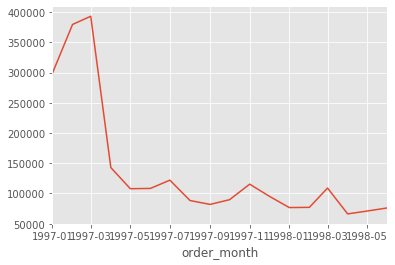

In [9]:
df.groupby('order_month')['order_amount'].sum().plot()

1-3月消费金额较高，4月出现巨大下滑，4月以后消费金额总体比较平稳

## 1.2 每月消费次数

In [10]:
df.groupby('order_month')['order_amount'].count()

order_month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: order_amount, dtype: int64

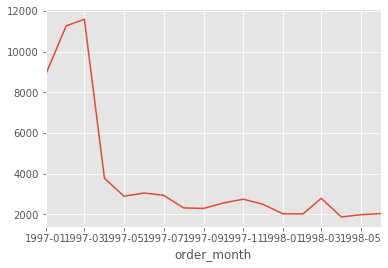

In [11]:
df.groupby('order_month')['order_amount'].count().plot()

1-3月消费次数较多，4月出现巨大下滑，4月以后消费次数总体比较平稳  
与消费金额的走势相似

## 1.3 每月产品购买量

In [12]:
df.groupby('order_month')['order_products'].sum()

order_month
1997-01-01    19416
1997-02-01    24921
1997-03-01    26159
1997-04-01     9729
1997-05-01     7275
1997-06-01     7301
1997-07-01     8131
1997-08-01     5851
1997-09-01     5729
1997-10-01     6203
1997-11-01     7812
1997-12-01     6418
1998-01-01     5278
1998-02-01     5340
1998-03-01     7431
1998-04-01     4697
1998-05-01     4903
1998-06-01     5287
Name: order_products, dtype: int64

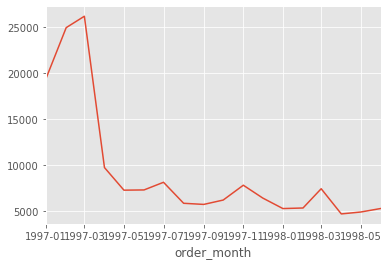

In [13]:
df.groupby('order_month')['order_products'].sum().plot()

走势与消费金额、消费次数相似

## 1.4 每月消费人数

In [14]:
df.groupby('order_month')['user_id'].count()

order_month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: user_id, dtype: int64

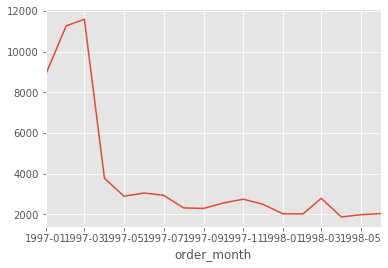

In [15]:
df.groupby('order_month')['user_id'].count().plot()

走势与前三者相似

In [16]:
df.pivot_table(index = 'order_month',
              values = ['order_products','order_amount','user_id'],
              aggfunc={'order_products':'sum',
                      'order_amount':'sum',
                      'user_id':'count'})

,order_amount,order_products,user_id
order_month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


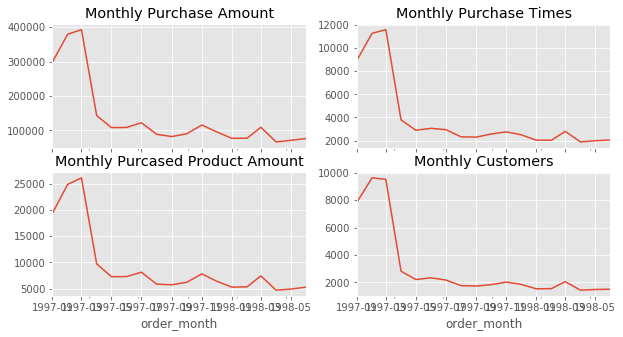

In [17]:
fig, ax = plt.subplots(2,2,figsize=(10,5), sharex=True)
df.groupby('order_month')['order_amount'].sum().plot(ax = ax[0][0], title='Monthly Purchase Amount')
df.groupby('order_month')['order_amount'].count().plot(ax = ax[0][1], title='Monthly Purchase Times')
df.groupby('order_month')['order_products'].sum().plot(ax = ax[1][0], title='Monthly Purcased Product Amount')
df.groupby('order_month')['user_id'].apply(lambda x: len(x.unique())).plot(ax = ax[1][1], title='Monthly Customers')

# 2. 用户个体消费分析
+ 用户消费金额、消费次数的描述统计
+ 用户消费金额和消费次数的散点图
+ 用户消费金额的分布图
+ 用户消费次数的分布图
+ 用户累计消费金额占比

In [18]:
grouped_user = df.groupby('user_id')

## 2.1 用户消费金额、消费次数的描述统计

In [19]:
grouped_user['order_amount','order_products'].sum().describe()

,order_amount,order_products
count,23570.000000,23570.000000
mean,106.080426,7.122656
std,240.925195,16.983531
min,0.000000,1.000000
25%,19.970000,1.000000
50%,43.395000,3.000000
75%,106.475000,7.000000
max,13990.930000,1033.000000


+ 用户平均消费金额=前25%消费金额，用户平均消费次数=前25%消费次数，说明存在比较狂热的用户，消费金额非常大，次数非常多

## 2.2 用户消费金额和消费次数的散点图

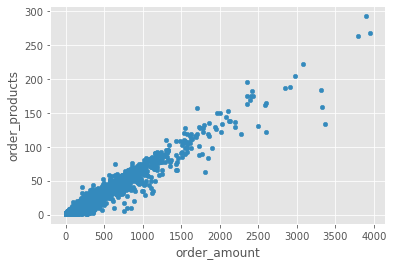

In [20]:
grouped_user['order_amount','order_products'].sum().query('order_amount<4000').plot.scatter(x = 'order_amount', y='order_products')

## 2.3 用户消费金额的分布图

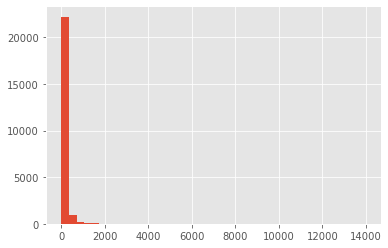

In [21]:
grouped_user.sum().order_amount.hist(bins=40)

用户消费金额绝大多数呈现集中趋势，少部分异常值干扰了判断，可以使用**过滤操作**排除异常

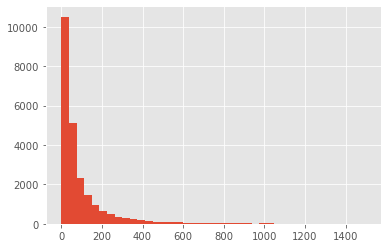

In [22]:
grouped_user.sum().query('order_amount < 1500').order_amount.hist(bins=40)

## 2.4 用户消费次数的分布图

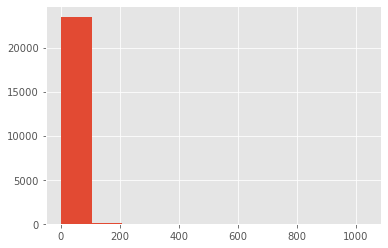

In [23]:
grouped_user.sum().order_products.hist()

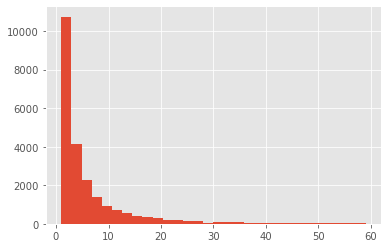

In [24]:
grouped_user.sum().query('order_products < 60').order_products.hist(bins = 30)

## 2.5 用户累计消费金额占比

In [25]:
user_cumsum = grouped_user.sum().sort_values('order_amount',ascending=True).apply(lambda x:x.cumsum()/x.sum()).order_amount
user_cumsum

user_id
10175    0.000000
4559     0.000000
1948     0.000000
925      0.000000
10798    0.000000
           ...   
7931     0.985405
19339    0.988025
7983     0.990814
14048    0.994404
7592     1.000000
Name: order_amount, Length: 23570, dtype: float64

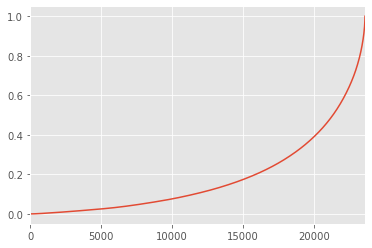

In [26]:
user_cumsum.reset_index().order_amount.plot()

按照用户消费金额进行升序排列，由图可知后50%的用户仅贡献了15%的消费额度，而排名前5000的用户贡献了40%的消费额度。

# 3. 用户消费行为
+ 用户第一次消费（首购）
+ 用户最后一次消费
+ 新老客消费比
    + 多少用户仅消费了一次?
    + 每月新客占比？
+ 用户分层
    + RFM
    + 新、老、活跃、回流、流失
+ 用户购买周期（按订单）
    + 用户消费周期描述
    + 用户消费周期分布
+ 用户生命周期（按第一次&最近一次消费）
    + 用户生命周期描述
    + 用户生命周期分布
    
## 3.1 用户第一次消费（首购）

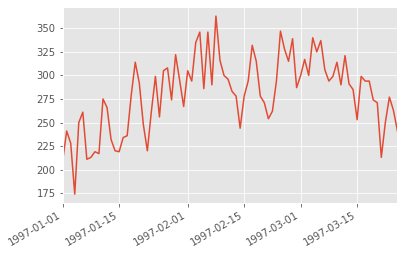

In [27]:
grouped_user.order_dt.min().value_counts().plot()

用户第一次购分布，集中在1-3月，其中2月11-25日有剧烈波动

## 3.2 用户最后一次消费

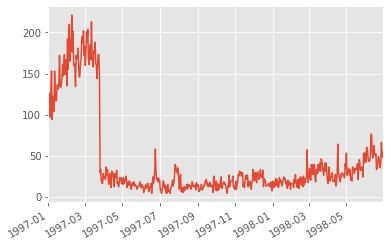

In [28]:
grouped_user.order_dt.max().value_counts().plot()

用户最后一次购买的分布：  
大部分最后一次购买集中在前仨个月，说明有很多用户购买完了以后就不再购买了  
随着时间的递增，最后一次购买的次数也在递增，说明流失呈现上升情况

## 3.3 新老客消费比

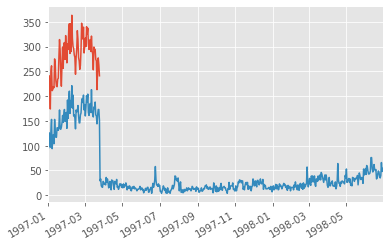

In [29]:
fig,ax = plt.subplots()
grouped_user.order_dt.min().value_counts().plot(ax = ax)
grouped_user.order_dt.max().value_counts().plot(ax = ax)

In [30]:
user_life = grouped_user.order_dt.agg(['min','max'])
(user_life['min'] == user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

有一半的用户只消费了一次

## 3.4 用户分层
### 3.4.1 RFM

In [31]:
rfm = df.pivot_table(index = 'user_id',
                    values = ['order_products', 'order_dt', 'order_amount'],
                    aggfunc = {'order_products': 'sum',
                              'order_dt':'max',
                              'order_amount': 'sum'})

In [32]:
rfm

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29
...,...,...,...
23566,36.00,1997-03-25,2
23567,20.97,1997-03-25,1
23568,121.70,1997-04-22,6


In [33]:
days = rfm['order_dt'].max() - rfm['order_dt']
rfm['recency'] = days.map(lambda x: x.days)

In [34]:
def rfm_func(rfm):
    rfm = rfm[['order_amount','order_products','recency']].apply(lambda x:x-x.mean(), axis = 0)
    for column in rfm:
        rfm[column] = rfm[column].apply(lambda x: '0' if x<0 else '1')
    label = rfm.apply(lambda x:x[0]+x[1]+x[2], axis = 1)
    label_rfm={'111': '重要价值客户',
          '011': '一般价值客户',
          '101': '重要发展客户',
          '110': '重要保持客户',
          '001': '一般发展客户',
          '010': '一般保持客户',
          '100': '重要挽留客户',
          '000': '一般挽留客户'}
    return label.map(label_rfm)

In [35]:
rfm['label'] = rfm_func(rfm)
rfm.head()

,order_amount,order_dt,order_products,recency,label
user_id,,,,,
1,11.77,1997-01-01,1,545,一般发展客户
2,89.00,1997-01-12,6,534,一般发展客户
3,156.46,1998-05-28,16,33,重要保持客户
4,100.50,1997-12-12,7,200,一般挽留客户
5,385.61,1998-01-03,29,178,重要保持客户


In [36]:
rfm.groupby('label').sum()

,order_amount,order_products,recency
label,,,
一般价值客户,7181.28,650,36295
一般保持客户,19937.45,1712,29448
一般发展客户,438291.81,29346,6951815
一般挽留客户,196971.23,13977,591108
重要价值客户,167080.83,11121,358363
重要保持客户,1592039.62,107789,517267
重要发展客户,33028.40,1263,114482
重要挽留客户,45785.01,2023,56636


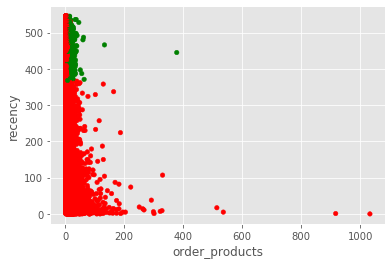

In [37]:
rfm.loc[rfm['label'] == '重要价值客户', 'color'] = 'g'
rfm.loc[rfm['label'] != '重要价值客户', 'color'] = 'r'
rfm.plot.scatter('order_products','recency',c=rfm.color)

### 3.4.2 新/活跃/回流/流失客

In [39]:
pivot_counts = df.pivot_table(index = 'user_id',
                             columns = 'order_month',
                             values = 'order_dt',
                             aggfunc = 'count').fillna(0)
pivot_counts.head()

order_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_purchase = pivot_counts.applymap(lambda x:1 if x > 0 else 0)
month_index = df_purchase.columns
df_purchase.head()

order_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [41]:
def customer_status_func(customer):
    purchase_cum = customer.cumsum()
    state = []
    for month in range(0,len(purchase_cum)):
        cum_current_month = purchase_cum[month]
        current_month = customer[month]
        last_month = customer[max(month-1, 0)]
        if cum_current_month == 0: state.append('Not Registered')
        elif current_month == 0: state.append('Unactive')
        elif cum_current_month == 1 & current_month == 1: state.append('New')
        elif (1-last_month)*current_month == 1 : state.append('Return')
        else: state.append('Active')
    return state

In [42]:
customer_status_func(df_purchase.loc[3])

['New',
 'Unactive',
 'Return',
 'Active',
 'Unactive',
 'Unactive',
 'Unactive',
 'Unactive',
 'Unactive',
 'Unactive',
 'Return',
 'Unactive',
 'Unactive',
 'Unactive',
 'Unactive',
 'Unactive',
 'Return',
 'Unactive']

In [43]:
customer_status = pd.DataFrame(df_purchase.apply(customer_status_func, axis = 1))
customer_status = pd.DataFrame(customer_status[0].str).T
customer_status.columns = month_index

In [45]:
customer_status.head()

order_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,New,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive
2,New,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive
3,New,Unactive,Return,Active,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Return,Unactive,Unactive,Unactive,Unactive,Unactive,Return,Unactive
4,New,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Return,Unactive,Unactive,Unactive,Return,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive
5,New,Active,Unactive,Return,Active,Active,Active,Unactive,Return,Unactive,Unactive,Return,Active,Unactive,Unactive,Unactive,Unactive,Unactive


In [46]:
customer_status.tail()

order_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
23566,Not Registered,Not Registered,New,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive
23567,Not Registered,Not Registered,New,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive
23568,Not Registered,Not Registered,New,Active,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive
23569,Not Registered,Not Registered,New,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive
23570,Not Registered,Not Registered,New,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive,Unactive


In [59]:
purchase_state = customer_status.apply(lambda x:pd.value_counts(x)).drop('Not Registered').fillna(0).T
purchase_state

,Active,New,Return,Unactive
order_month,,,,
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0


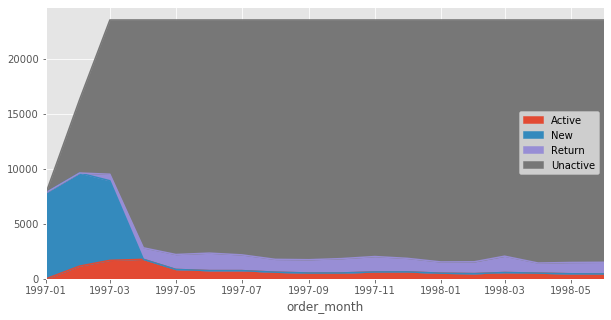

In [60]:
purchase_state.plot.area(figsize=(10,5))

In [63]:
purchase_state.apply(lambda x: x/sum(x),axis = 1)

,Active,New,Return,Unactive
order_month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


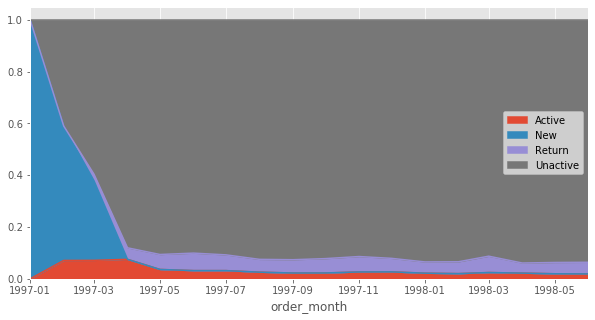

In [64]:
purchase_state.apply(lambda x: x/sum(x), axis = 1).plot.area(figsize=(10,5))

## 3.5 用户购买周期（按订单）

In [66]:
order_diff = grouped_user.apply(lambda x: x.order_dt - x.order_dt.shift(1))
order_diff

user_id       
1        0           NaT
2        1           NaT
         2        0 days
3        3           NaT
         4       87 days
                   ...  
23568    69654   11 days
         69655   17 days
23569    69656       NaT
23570    69657       NaT
         69658    1 days
Name: order_dt, Length: 69659, dtype: timedelta64[ns]

In [67]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

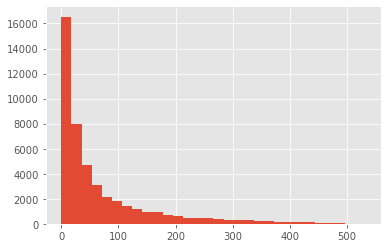

In [76]:
order_diff.apply(lambda x:x.days).hist(bins = 30)

+ 订单周期呈指数分布
+ 用户平均购买周期是68天
+ 绝大部分用户购买周期低于100天

## 3.6 用户生命周期（第一次&最后一次消费）

In [77]:
user_life = grouped_user.order_dt.agg(['min','max'])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [80]:
(user_life['min'] == user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

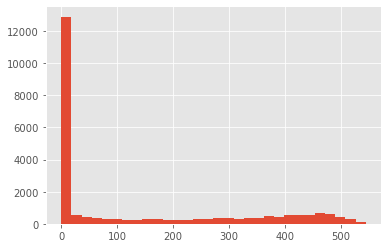

In [81]:
(user_life['max'] - user_life['min']).apply(lambda x:x.days).hist(bins = 30)

+ 用户生命周期受只够买一次的用户影响比较厉害（可以排除）
+ 用户平均消费134天，中位数0天

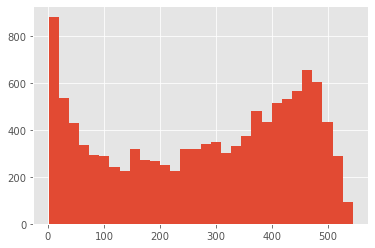

In [103]:
(user_life['max'] - user_life['min']).apply(lambda x: x.days).replace(0,np.nan).dropna().hist(bins = 30)

# 4. 回购率和复购率

+ 复购率：自然月内，购买多次的用户占比
+ 回购率：曾经购买过的用户在某一时期内的再次购买的占比

In [104]:
pivot_counts

order_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
def repurchase_rate_in_one_month(x):
    num_once_purchase = sum(x.apply(lambda x:1 if x == 1 else 0))
    num_multi_purchase = sum(x.apply(lambda x:1 if x > 1 else 0))
    return num_multi_purchase/(num_multi_purchase+num_once_purchase)

In [108]:
pivot_counts.apply(repurchase_rate_in_one_month, axis = 0)

order_month
1997-01-01    0.107571
1997-02-01    0.122288
1997-03-01    0.155292
1997-04-01    0.223600
1997-05-01    0.196929
1997-06-01    0.195810
1997-07-01    0.215138
1997-08-01    0.200339
1997-09-01    0.202415
1997-10-01    0.206634
1997-11-01    0.202170
1997-12-01    0.219957
1998-01-01    0.210800
1998-02-01    0.203095
1998-03-01    0.229612
1998-04-01    0.199026
1998-05-01    0.200269
1998-06-01    0.214475
dtype: float64

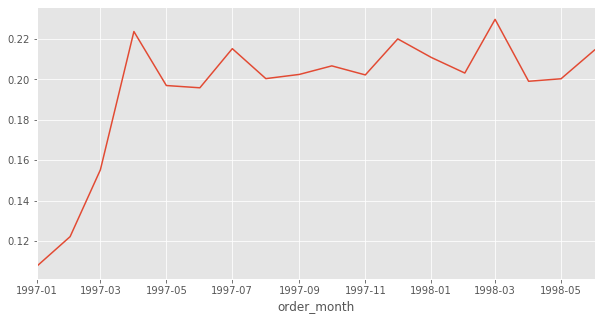

In [110]:
pivot_counts.apply(repurchase_rate_in_one_month, axis = 0).plot(figsize=(10,5))

复购率稳定在20%左右，前三个月因有大量新用户涌入，而这批用户只购买量一次，所以导致复购率较低

In [136]:
def repurchase_in_next_month(customer):
    return (customer*(customer.shift(-1)+0.5)).fillna(0).map({0:np.nan, 0.5:0, 1.5:1})

In [138]:
repurchase_in_next_month_df = df_purchase.apply(repurchase_in_next_month, axis = 1)
repurchase_in_next_month_df.head()

order_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


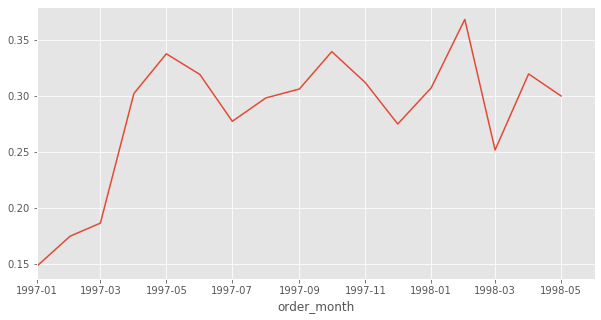

In [140]:
(repurchase_in_next_month_df.sum()/repurchase_in_next_month_df.count()).plot(figsize=(10,5))